In [516]:
import pandas as pd
import numpy as np
from glob import glob  
import os
from collections import Counter
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

#### Building Data Frame [ 1: kotlin files]

In [517]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\kt'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder print("0x{:02x}: {}".format(value, frequency),len(val),"\n",text)
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
    #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
    for prob_value, prob_dist_freq in prob_dist_c.most_common(n=7):
        prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
        prob_val.append("{:02x}".format(prob_value))
        prob_freq.append("{:.0%}".format(prob_dist_freq))
    #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
    for value, frequency in c.most_common(n=7):
        freq_value.append("0x{:02x}: {}".format(value,frequency))
        val.append("{:02x}".format(value))
        freq.append("{}".format(frequency))
    list_of_text.append((c,val,freq,freq_value,prob_val,prob_freq,prob_freq_dist_value,text,file))
df_kt = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:Frequency','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Value:ProbalilityDistribution','Text', 'Filename'])


print(df_kt.info())
print("*" * 80)
print(df_kt.memory_usage())
print("*" * 80)
df_kt.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             998 non-null    object
 1   OnlyValueForAbsoluteDistribution     998 non-null    object
 2   OnlyFrequency                        998 non-null    object
 3   Value:Frequency                      998 non-null    object
 4   OnlyValueForProbalilityDistribution  998 non-null    object
 5   OnlyProbalilityDistribution          998 non-null    object
 6   Value:ProbalilityDistribution        998 non-null    object
 7   Text                                 998 non-null    object
 8   Filename                             998 non-null    object
dtypes: object(9)
memory usage: 70.3+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:Frequency,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Value:ProbalilityDistribution,Text,Filename
0,"{47: 21, 42: 39, 10: 90, 32: 492, 67: 11, 111:...","[20, 65, 74, 69, 6e, 6f, 61]","[492, 198, 182, 181, 158, 112, 107]","[0x20: 492, 0x65: 198, 0x74: 182, 0x69: 181, 0...","[20, 65, 74, 69, 6e, 6f, 61]","[18%, 7%, 7%, 7%, 6%, 4%, 4%]","[0x20: 0.1769, 0x65: 0.0712, 0x74: 0.0654, 0x6...",b'/*\n * Copyright (C) 2018 The Android Open S...,0.kt
1,"{112: 7, 97: 17, 99: 17, 107: 1, 103: 6, 101: ...","[20, 74, 6f, 65, 69, 6e, 61]","[40, 32, 28, 23, 23, 21, 17]","[0x20: 40, 0x74: 32, 0x6f: 28, 0x65: 23, 0x69:...","[20, 74, 6f, 65, 69, 6e, 61]","[11%, 9%, 8%, 6%, 6%, 6%, 5%]","[0x20: 0.1072, 0x74: 0.0858, 0x6f: 0.0751, 0x6...",b'package com.trendyol.common\n\nimport androi...,1.kt


#### Building Data Frame [ 2: mak files]

In [518]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\mak'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
    #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
    for prob_value, prob_dist_freq in prob_dist_c.most_common(n=7):
        prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
        prob_val.append("{:02x}".format(prob_value))
        prob_freq.append("{:.0%}".format(prob_dist_freq))
    #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
    for value, frequency in c.most_common(n=7):
        freq_value.append("0x{:02x}: {}".format(value,frequency))
        val.append("{:02x}".format(value))
        freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))
# create a dataframe and save
df_mak = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])


print(df_mak.info())
print("*" * 80)
print(df_mak.memory_usage())
print("*" * 80)
df_mak.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             96 non-null     object
 1   Value:Frequency                      96 non-null     object
 2   OnlyValueForAbsoluteDistribution     96 non-null     object
 3   OnlyFrequency                        96 non-null     object
 4   Value:ProbalilityDistribution        96 non-null     object
 5   OnlyValueForProbalilityDistribution  96 non-null     object
 6   OnlyProbalilityDistribution          96 non-null     object
 7   Text                                 96 non-null     object
 8   Filename                             96 non-null     object
dtypes: object(9)
memory usage: 6.9+ KB
None
********************************************************************************
Index                                  128
OccurrenceOfBy

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 24, 32: 213, 116: 71, 104: 58, 101: 255, ...","[0x65: 255, 0x20: 213, 0x5f: 165, 0x6e: 150, 0...","[65, 20, 5f, 6e, 61, 69, 6c]","[255, 213, 165, 150, 129, 113, 109]","[0x65: 0.0935, 0x20: 0.0781, 0x5f: 0.0605, 0x6...","[65, 20, 5f, 6e, 61, 69, 6c]","[9%, 8%, 6%, 6%, 5%, 4%, 4%]",b'# these are the variables your Makefile.am s...,0.mak
1,"{32: 1332, 35: 369, 13: 44, 10: 44, 67: 21, 10...","[0x20: 1332, 0x23: 369, 0x65: 74, 0x74: 72, 0x...","[20, 23, 65, 74, 2d, 6f, 69]","[1332, 369, 74, 72, 68, 67, 67]","[0x20: 0.4268, 0x23: 0.1182, 0x65: 0.0237, 0x7...","[20, 23, 65, 74, 2d, 6f, 69]","[43%, 12%, 2%, 2%, 2%, 2%, 2%]","b"" ###########################################...",1.mak


#### Building Data Frame [ 3: ml files]

In [519]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\ml'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for prob_value, prob_dist_freq in prob_dist_c.most_common(n=7):
            prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
            prob_val.append("{:02x}".format(prob_value))
            prob_freq.append("{:.0%}".format(prob_dist_freq))
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for value, frequency in c.most_common(n=7):
            freq_value.append("0x{:02x}: {}".format(value,frequency))
            val.append("{:02x}".format(value))
            freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))
# create a dataframe and save
df_ml = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])


print(df_ml.info())
print("*" * 80)
print(df_ml.memory_usage())
print("*" * 80)
df_ml.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             263 non-null    object
 1   Value:Frequency                      263 non-null    object
 2   OnlyValueForAbsoluteDistribution     263 non-null    object
 3   OnlyFrequency                        263 non-null    object
 4   Value:ProbalilityDistribution        263 non-null    object
 5   OnlyValueForProbalilityDistribution  263 non-null    object
 6   OnlyProbalilityDistribution          263 non-null    object
 7   Text                                 263 non-null    object
 8   Filename                             263 non-null    object
dtypes: object(9)
memory usage: 18.6+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{40: 31, 42: 50, 32: 644, 67: 9, 111: 95, 112:...","[0x20: 644, 0x65: 193, 0x74: 158, 0x69: 157, 0...","[20, 65, 74, 69, 6e, 61, 72]","[644, 193, 158, 157, 121, 114, 101]","[0x20: 0.2264, 0x65: 0.0678, 0x74: 0.0555, 0x6...","[20, 65, 74, 69, 6e, 61, 72]","[23%, 7%, 6%, 6%, 4%, 4%, 4%]","b""(* Copyright (C) 2005, HELM Team.\n * \n * T...",0.ml
1,"{111: 941, 112: 642, 101: 1741, 110: 1352, 32:...","[0x20: 4404, 0x65: 1741, 0x6e: 1352, 0x74: 132...","[20, 65, 6e, 74, 5f, 69, 72]","[4404, 1741, 1352, 1326, 1220, 1117, 1056]","[0x20: 0.1860, 0x65: 0.0735, 0x6e: 0.0571, 0x7...","[20, 65, 6e, 74, 5f, 69, 72]","[19%, 7%, 6%, 6%, 5%, 5%, 4%]",b'open Printer\nopen CErrors\nopen Util\nopen ...,1.ml


#### Building Data Frame [ 4: rexx files]

In [520]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\rexx'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for prob_value, prob_dist_freq in prob_dist_c.most_common(n=7):
            prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
            prob_val.append("{:02x}".format(prob_value))
            prob_freq.append("{:.0%}".format(prob_dist_freq))
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for value, frequency in c.most_common(n=7):
            freq_value.append("0x{:02x}: {}".format(value,frequency))
            val.append("{:02x}".format(value))
            freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))
# create a dataframe and save
df_rexx = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])

print(df_rexx.info())
print("*" * 80)
print(df_rexx.memory_usage())
print("*" * 80)
df_rexx.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             242 non-null    object
 1   Value:Frequency                      242 non-null    object
 2   OnlyValueForAbsoluteDistribution     242 non-null    object
 3   OnlyFrequency                        242 non-null    object
 4   Value:ProbalilityDistribution        242 non-null    object
 5   OnlyValueForProbalilityDistribution  242 non-null    object
 6   OnlyProbalilityDistribution          242 non-null    object
 7   Text                                 242 non-null    object
 8   Filename                             242 non-null    object
dtypes: object(9)
memory usage: 17.1+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{47: 4, 42: 8, 32: 120, 80: 5, 68: 2, 87: 2, 8...","[0x20: 120, 0x27: 18, 0x0a: 17, 0x65: 16, 0x72...","[20, 27, 0a, 65, 72, 70, 74]","[120, 18, 17, 16, 15, 10, 9]","[0x20: 0.3226, 0x27: 0.0484, 0x0a: 0.0457, 0x6...","[20, 27, 0a, 65, 72, 70, 74]","[32%, 5%, 5%, 4%, 4%, 3%, 2%]","b""/* PDWPRCEV REXX Process output of 'runp...",0.rexx
1,"{47: 8, 42: 230, 32: 496, 82: 15, 69: 11, 88: ...","[0x20: 496, 0x2a: 230, 0x61: 149, 0x6e: 139, 0...","[20, 2a, 61, 6e, 65, 74, 72]","[496, 230, 149, 139, 136, 112, 107]","[0x20: 0.1800, 0x2a: 0.0835, 0x61: 0.0541, 0x6...","[20, 2a, 61, 6e, 65, 74, 72]","[18%, 8%, 5%, 5%, 5%, 4%, 4%]","b""/* REXX ************************************...",1.rexx


#### Building Data Frame [ 5: csproj files]

In [521]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\csproj'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for prob_value, prob_dist_freq in prob_dist_c.most_common(n=7):
            prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
            prob_val.append("{:02x}".format(prob_value))
            prob_freq.append("{:.0%}".format(prob_dist_freq))
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for value, frequency in c.most_common(n=7):
            freq_value.append("0x{:02x}: {}".format(value,frequency))
            val.append("{:02x}".format(value))
            freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))

# create a dataframe and save
df_csproj = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])

print(df_csproj.info())
print("*" * 80)
print(df_csproj.memory_usage())
print("*" * 80)
df_csproj.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             235 non-null    object
 1   Value:Frequency                      235 non-null    object
 2   OnlyValueForAbsoluteDistribution     235 non-null    object
 3   OnlyFrequency                        235 non-null    object
 4   Value:ProbalilityDistribution        235 non-null    object
 5   OnlyValueForProbalilityDistribution  235 non-null    object
 6   OnlyProbalilityDistribution          235 non-null    object
 7   Text                                 235 non-null    object
 8   Filename                             235 non-null    object
dtypes: object(9)
memory usage: 16.6+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{239: 1, 187: 1, 191: 1, 60: 22, 80: 16, 114: ...","[0x20: 43, 0x65: 42, 0x72: 40, 0x74: 39, 0x6f:...","[20, 65, 72, 74, 6f, 61, 3c]","[43, 42, 40, 39, 36, 27, 22]","[0x20: 0.0692, 0x65: 0.0676, 0x72: 0.0644, 0x7...","[20, 65, 72, 74, 6f, 61, 3c]","[7%, 7%, 6%, 6%, 6%, 4%, 4%]","b'\xef\xbb\xbf<Project Sdk=""Microsoft.NET.Sdk""...",0.csproj
1,"{239: 1, 187: 1, 191: 1, 60: 29, 80: 21, 114: ...","[0x65: 152, 0x20: 113, 0x72: 83, 0x74: 76, 0x6...","[65, 20, 72, 74, 6f, 61, 6e]","[152, 113, 83, 76, 74, 67, 64]","[0x65: 0.1086, 0x20: 0.0807, 0x72: 0.0593, 0x7...","[65, 20, 72, 74, 6f, 61, 6e]","[11%, 8%, 6%, 5%, 5%, 5%, 5%]","b'\xef\xbb\xbf<Project Sdk=""Microsoft.NET.Sdk""...",1.csproj


#### Building Data Frame [ 6: jenkinsfile files]

In [522]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\jenkinsfile'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for prob_value, prob_dist_freq in prob_dist_c.most_common(n=7):
            prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
            prob_val.append("{:02x}".format(prob_value))
            prob_freq.append("{:.0%}".format(prob_dist_freq))
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for value, frequency in c.most_common(n=7):
            freq_value.append("0x{:02x}: {}".format(value,frequency))
            val.append("{:02x}".format(value))
            freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))

# create a dataframe and save
df_jenkinsfile = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])

print(df_jenkinsfile.info())
print("*" * 80)
print(df_jenkinsfile.memory_usage())
print("*" * 80)
df_jenkinsfile.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             249 non-null    object
 1   Value:Frequency                      249 non-null    object
 2   OnlyValueForAbsoluteDistribution     249 non-null    object
 3   OnlyFrequency                        249 non-null    object
 4   Value:ProbalilityDistribution        249 non-null    object
 5   OnlyValueForProbalilityDistribution  249 non-null    object
 6   OnlyProbalilityDistribution          249 non-null    object
 7   Text                                 249 non-null    object
 8   Filename                             249 non-null    object
dtypes: object(9)
memory usage: 17.6+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{74: 1, 101: 15, 110: 6, 107: 2, 105: 10, 115:...","[0x20: 83, 0x65: 15, 0x0a: 14, 0x69: 10, 0x73:...","[20, 65, 0a, 69, 73, 70, 6e]","[83, 15, 14, 10, 8, 8, 6]","[0x20: 0.3934, 0x65: 0.0711, 0x0a: 0.0664, 0x6...","[20, 65, 0a, 69, 73, 70, 6e]","[39%, 7%, 7%, 5%, 4%, 4%, 3%]","b""Jenkinsfile (Declarative Pipeline)\n\npipeli...",0.jenkinsfile
1,"{110: 17, 111: 13, 100: 2, 101: 39, 32: 109, 1...","[0x20: 109, 0x65: 39, 0x74: 34, 0x73: 32, 0x22...","[20, 65, 74, 73, 22, 5c, 61]","[109, 39, 34, 32, 30, 22, 19]","[0x20: 0.2261, 0x65: 0.0809, 0x74: 0.0705, 0x7...","[20, 65, 74, 73, 22, 5c, 61]","[23%, 8%, 7%, 7%, 6%, 5%, 4%]","b'node {\n test = ""<testsuite tests=\\""3\\""...",1.jenkinsfile


##  Splitting above data frames to form train, validation and test data frame

In [523]:
print((df_kt.shape,df_mak.shape,df_ml.shape,df_rexx.shape,df_csproj.shape,df_jenkinsfile.shape))

((998, 9), (96, 9), (263, 9), (242, 9), (235, 9), (249, 9))


##### Train and Test dataframe for kt files

In [524]:
df_kt_train, df_kt_test = train_test_split(df_kt, test_size=0.3)
df_kt_train.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:Frequency,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Value:ProbalilityDistribution,Text,Filename
0,"{47: 6, 42: 15, 10: 61, 32: 265, 67: 43, 111: ...","[20, 65, 6f, 74, 6e, 69, 63]","[265, 209, 184, 167, 129, 116, 103]","[0x20: 265, 0x65: 209, 0x6f: 184, 0x74: 167, 0...","[20, 65, 6f, 74, 6e, 69, 63]","[12%, 9%, 8%, 8%, 6%, 5%, 5%]","[0x20: 0.1191, 0x65: 0.0939, 0x6f: 0.0827, 0x7...","b'/*\n * Copyright 2019-present Facebook, Inc....",540.kt
1,"{112: 27, 97: 51, 99: 53, 107: 8, 103: 7, 101:...","[20, 65, 72, 74, 69, 6f, 2e]","[353, 137, 97, 93, 63, 62, 59]","[0x20: 353, 0x65: 137, 0x72: 97, 0x74: 93, 0x6...","[20, 65, 72, 74, 69, 6f, 2e]","[24%, 9%, 7%, 6%, 4%, 4%, 4%]","[0x20: 0.2396, 0x65: 0.0930, 0x72: 0.0659, 0x7...",b'package net.yslibrary.monotweety.data.user.r...,61.kt


In [525]:
df_kt_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:Frequency,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Value:ProbalilityDistribution,Text,Filename
0,"{112: 26, 97: 147, 99: 53, 107: 7, 103: 24, 10...","[20, 61, 65, 6f, 74, 72, 73]","[571, 147, 146, 128, 116, 110, 97]","[0x20: 571, 0x61: 147, 0x65: 146, 0x6f: 128, 0...","[20, 61, 65, 6f, 74, 72, 73]","[22%, 6%, 6%, 5%, 4%, 4%, 4%]","[0x20: 0.2155, 0x61: 0.0555, 0x65: 0.0551, 0x6...",b'package org.kotlin99.graphs\n\nimport com.na...,127.kt
1,"{112: 18, 97: 61, 99: 9, 107: 3, 103: 22, 101:...","[20, 65, 61, 6e, 74, 69, 72]","[87, 68, 61, 60, 55, 55, 49]","[0x20: 87, 0x65: 68, 0x61: 61, 0x6e: 60, 0x74:...","[20, 65, 61, 6e, 74, 69, 72]","[11%, 9%, 8%, 8%, 7%, 7%, 6%]","[0x20: 0.1097, 0x65: 0.0858, 0x61: 0.0769, 0x6...",b'package com.star_zero.navigation_keep_fragme...,122.kt


##### Train and Test dataframe for mak files

In [526]:
df_mak_train, df_mak_test = train_test_split(df_mak, test_size=0.3)
df_mak_train.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 487, 13: 145, 10: 145, 32: 397, 67: 24, 1...","[0x23: 487, 0x20: 397, 0x6f: 249, 0x65: 190, 0...","[23, 20, 6f, 65, 74, 2e, 0d]","[487, 397, 249, 190, 163, 157, 145]","[0x23: 0.1218, 0x20: 0.0993, 0x6f: 0.0623, 0x6...","[23, 20, 6f, 65, 74, 2e, 0d]","[12%, 10%, 6%, 5%, 4%, 4%, 4%]","b""############################################...",73.mak
1,"{35: 42, 32: 151, 45: 6, 42: 2, 99: 16, 111: 4...","[0x20: 151, 0x65: 106, 0x60: 102, 0x69: 70, 0x...","[20, 65, 60, 69, 74, 73, 72]","[151, 106, 102, 70, 64, 57, 55]","[0x20: 0.0986, 0x65: 0.0692, 0x60: 0.0666, 0x6...","[20, 65, 60, 69, 74, 73, 72]","[10%, 7%, 7%, 5%, 4%, 4%, 4%]",b'## -*- coding: utf-8 -*-\r\n##\r\n## NetProf...,48.mak


In [527]:
df_mak_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{83: 627, 72: 306, 69: 1212, 76: 301, 61: 61, ...","[0x45: 1212, 0x5f: 1190, 0x24: 953, 0x28: 953,...","[45, 5f, 24, 28, 29, 42, 54]","[1212, 1190, 953, 953, 953, 854, 781]","[0x45: 0.0616, 0x5f: 0.0605, 0x24: 0.0485, 0x2...","[45, 5f, 24, 28, 29, 42, 54]","[6%, 6%, 5%, 5%, 5%, 4%, 4%]",b'SHELL=/bin/sh\r\n\r\n#\r\n# Versioning\r\n#\...,5.mak
1,"{35: 421, 13: 117, 10: 117, 32: 372, 70: 21, 1...","[0x23: 421, 0x20: 372, 0x65: 205, 0x69: 133, 0...","[23, 20, 65, 69, 73, 0d, 0a]","[421, 372, 205, 133, 119, 117, 117]","[0x23: 0.1280, 0x20: 0.1131, 0x65: 0.0623, 0x6...","[23, 20, 65, 69, 73, 0d, 0a]","[13%, 11%, 6%, 4%, 4%, 4%, 4%]",b'############################################...,7.mak


##### Train and Test dataframe for ml files

In [528]:
df_ml_train, df_ml_test = train_test_split(df_ml, test_size=0.3)
df_ml_train.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{111: 157, 112: 43, 101: 227, 110: 127, 32: 79...","[0x20: 799, 0x74: 232, 0x65: 227, 0x72: 175, 0...","[20, 74, 65, 72, 6f, 6e, 69]","[799, 232, 227, 175, 157, 127, 127]","[0x20: 0.2333, 0x74: 0.0677, 0x65: 0.0663, 0x7...","[20, 74, 65, 72, 6f, 6e, 69]","[23%, 7%, 7%, 5%, 5%, 4%, 4%]",b'open Lwt.Infix\n\nmodule C = Cohttp\nmodule...,114.ml
1,"{10: 158, 116: 15, 121: 27, 112: 33, 101: 122,...","[0x20: 324, 0x28: 248, 0x29: 248, 0x2c: 246, 0...","[20, 28, 29, 2c, 31, 32, 0a]","[324, 248, 248, 246, 187, 184, 158]","[0x20: 0.1144, 0x28: 0.0875, 0x29: 0.0875, 0x2...","[20, 28, 29, 2c, 31, 32, 0a]","[11%, 9%, 9%, 9%, 7%, 6%, 6%]",b'\ntype expr =\n | VarX\n | VarY\n | Sine ...,34.ml


In [529]:
df_ml_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{40: 250, 42: 286, 41: 250, 10: 755, 32: 7002,...","[0x20: 7002, 0x74: 1508, 0x65: 1407, 0x73: 116...","[20, 74, 65, 73, 6c, 72, 61]","[7002, 1508, 1407, 1169, 934, 831, 829]","[0x20: 0.3042, 0x74: 0.0655, 0x65: 0.0611, 0x7...","[20, 74, 65, 73, 6c, 72, 61]","[30%, 7%, 6%, 5%, 4%, 4%, 4%]",b'(*******************************************...,149.ml
1,"{111: 660, 112: 305, 101: 894, 110: 659, 33: 3...","[0x20: 2622, 0x65: 894, 0x69: 802, 0x74: 777, ...","[20, 65, 69, 74, 6f, 6e, 6c]","[2622, 894, 802, 777, 660, 659, 540]","[0x20: 0.1854, 0x65: 0.0632, 0x69: 0.0567, 0x7...","[20, 65, 69, 74, 6f, 6e, 6c]","[19%, 6%, 6%, 5%, 5%, 5%, 4%]","b'open! Core\nopen! Async\n\nlet title = ""Kind...",198.ml


##### Train and Test dataframe for rexx files

In [530]:
df_rexx_train, df_rexx_test = train_test_split(df_rexx, test_size=0.3)
df_rexx_train.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{47: 52, 42: 44, 82: 12, 69: 1, 88: 2, 32: 918...","[0x20: 918, 0xe2: 88, 0x94: 87, 0x80: 87, 0x65...","[20, e2, 94, 80, 65, 72, 6f]","[918, 88, 87, 87, 82, 70, 59]","[0x20: 0.4016, 0xe2: 0.0385, 0x94: 0.0381, 0x8...","[20, e2, 94, 80, 65, 72, 6f]","[40%, 4%, 4%, 4%, 4%, 3%, 3%]",b'/*REXX program solves Josephus problem: N...,204.rexx
1,"{47: 4, 42: 4, 32: 46, 97: 18, 114: 14, 101: 1...","[0x20: 46, 0x61: 18, 0x74: 16, 0x65: 15, 0x72:...","[20, 61, 74, 65, 72, 6c, 6e]","[46, 18, 16, 15, 14, 12, 11]","[0x20: 0.1893, 0x61: 0.0741, 0x74: 0.0658, 0x6...","[20, 61, 74, 65, 72, 6c, 6e]","[19%, 7%, 7%, 6%, 6%, 5%, 5%]","b""/* a rexx application to demonstrate the uni...",133.rexx


In [531]:
df_rexx_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{47: 87, 42: 84, 82: 8, 69: 6, 88: 7, 32: 1570...","[0x20: 1570, 0xe2: 136, 0x94: 131, 0x80: 127, ...","[20, e2, 94, 80, 65, 74, 6f]","[1570, 136, 131, 127, 115, 106, 101]","[0x20: 0.4313, 0xe2: 0.0374, 0x94: 0.0360, 0x8...","[20, e2, 94, 80, 65, 74, 6f]","[43%, 4%, 4%, 3%, 3%, 3%, 3%]",b'/*REXX program calculates the Nth root of ...,20.rexx
1,"{47: 18, 42: 18, 82: 4, 69: 5, 88: 2, 32: 261,...","[0x20: 261, 0x6f: 26, 0x65: 24, 0x61: 22, 0x72...","[20, 6f, 65, 61, 72, 2f, 2a]","[261, 26, 24, 22, 20, 18, 18]","[0x20: 0.4176, 0x6f: 0.0416, 0x65: 0.0384, 0x6...","[20, 6f, 65, 61, 72, 2f, 2a]","[42%, 4%, 4%, 4%, 3%, 3%, 3%]","b""/*REXX program demonstrates a FOREVER DO ...",10.rexx


##### Train and Test dataframe for csproj files

In [532]:
df_csproj_train, df_csproj_test = train_test_split(df_csproj, test_size=0.3)
df_csproj_train.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{239: 1, 187: 1, 191: 1, 60: 157, 63: 2, 120: ...","[0x20: 710, 0x65: 703, 0x45: 486, 0x74: 400, 0...","[20, 65, 45, 74, 6e, 72, 73]","[710, 703, 486, 400, 361, 345, 345]","[0x20: 0.0676, 0x65: 0.0669, 0x45: 0.0463, 0x7...","[20, 65, 45, 74, 6e, 72, 73]","[7%, 7%, 5%, 4%, 3%, 3%, 3%]","b'\xef\xbb\xbf<?xml version=""1.0"" encoding=""ut...",30.csproj
1,"{239: 1, 187: 1, 191: 1, 60: 470, 63: 2, 120: ...","[0x65: 1870, 0x20: 1752, 0x6e: 1543, 0x74: 127...","[65, 20, 6e, 74, 69, 2f, 61]","[1870, 1752, 1543, 1273, 1266, 879, 810]","[0x65: 0.0828, 0x20: 0.0776, 0x6e: 0.0684, 0x7...","[65, 20, 6e, 74, 69, 2f, 61]","[8%, 8%, 7%, 6%, 6%, 4%, 4%]","b'\xef\xbb\xbf<?xml version=""1.0"" encoding=""ut...",6.csproj


In [533]:
df_csproj_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{60: 15, 80: 7, 114: 29, 111: 20, 106: 4, 101:...","[0x20: 41, 0x65: 39, 0x72: 29, 0x6f: 20, 0x74:...","[20, 65, 72, 6f, 74, 0a, 63]","[41, 39, 29, 20, 19, 17, 16]","[0x20: 0.0983, 0x65: 0.0935, 0x72: 0.0695, 0x6...","[20, 65, 72, 6f, 74, 0a, 63]","[10%, 9%, 7%, 5%, 5%, 4%, 4%]","b'<Project Sdk=""Microsoft.NET.Sdk"">\n\n <Prop...",217.csproj
1,"{60: 21, 80: 9, 114: 43, 111: 36, 106: 5, 101:...","[0x65: 71, 0x20: 60, 0x72: 43, 0x6f: 36, 0x2e:...","[65, 20, 72, 6f, 2e, 63, 74]","[71, 60, 43, 36, 33, 28, 27]","[0x65: 0.0985, 0x20: 0.0832, 0x72: 0.0596, 0x6...","[65, 20, 72, 6f, 2e, 63, 74]","[10%, 8%, 6%, 5%, 5%, 4%, 4%]","b'<Project Sdk=""Microsoft.NET.Sdk"">\n <Proper...",45.csproj


##### Train and Test dataframe for jenkinsfile files

In [534]:
df_jenkinsfile_train, df_jenkinsfile_test = train_test_split(df_jenkinsfile, test_size=0.2)
df_jenkinsfile_train.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{112: 27, 105: 22, 101: 59, 108: 19, 110: 31, ...","[0x20: 962, 0x0a: 85, 0xe6: 74, 0x65: 59, 0x61...","[20, 0a, e6, 65, 61, e5, e4]","[962, 85, 74, 59, 57, 48, 44]","[0x20: 0.3729, 0x0a: 0.0329, 0xe6: 0.0287, 0x6...","[20, 0a, e6, 65, 61, e5, e4]","[37%, 3%, 3%, 2%, 2%, 2%, 2%]",b'pipeline{\n agent any\n \n tools...,189.jenkinsfile
1,"{64: 1, 76: 1, 105: 45, 98: 7, 114: 62, 97: 48...","[0x20: 380, 0x65: 125, 0x74: 86, 0x72: 62, 0x6...","[20, 65, 74, 72, 6f, 63, 6e]","[380, 125, 86, 62, 56, 52, 51]","[0x20: 0.2495, 0x65: 0.0821, 0x74: 0.0565, 0x7...","[20, 65, 74, 72, 6f, 63, 6e]","[25%, 8%, 6%, 4%, 4%, 3%, 3%]",b'@Library(\'utils\') _\n\nstage (\'Delete env...,219.jenkinsfile


In [535]:
df_jenkinsfile_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{47: 162, 32: 9454, 73: 110, 83: 111, 65: 118,...","[0x20: 9454, 0x65: 658, 0x74: 449, 0x0a: 433, ...","[20, 65, 74, 0a, 73, 69, 61]","[9454, 658, 449, 433, 423, 420, 420]","[0x20: 0.5109, 0x65: 0.0356, 0x74: 0.0243, 0x0...","[20, 65, 74, 0a, 73, 69, 61]","[51%, 4%, 2%, 2%, 2%, 2%, 2%]",b'// ISAAC SDK Development Pipeline\n//\n// Th...,107.jenkinsfile
1,"{112: 32, 105: 29, 101: 67, 108: 20, 110: 30, ...","[0x20: 820, 0x65: 67, 0x0a: 62, 0x73: 54, 0x61...","[20, 65, 0a, 73, 61, 6f, 72]","[820, 67, 62, 54, 43, 43, 41]","[0x20: 0.4447, 0x65: 0.0363, 0x0a: 0.0336, 0x7...","[20, 65, 0a, 73, 61, 6f, 72]","[44%, 4%, 3%, 3%, 2%, 2%, 2%]",b'pipeline {\n agent {\n node {\n ...,83.jenkinsfile


In [536]:
# Train and Test Data Frame for each type of files has been created above
#df_kt
#df_mak
#df_ml
#df_rexx
#df_csproj
#df_jenkinsfile

In [537]:
print((df_kt_train.shape,df_mak_train.shape,df_ml_train.shape,df_rexx_train.shape,df_csproj_train.shape,df_jenkinsfile_train.shape))

((698, 9), (67, 9), (184, 9), (169, 9), (164, 9), (199, 9))


In [538]:
print((df_kt_test.shape,df_mak_test.shape,df_ml_test.shape,df_rexx_test.shape,df_csproj_test.shape,df_jenkinsfile_test.shape))

((300, 9), (29, 9), (79, 9), (73, 9), (71, 9), (50, 9))


### Building the train data frame

In [539]:
frames = [df_jenkinsfile_train,df_csproj_train,df_rexx_train,df_ml_train,df_mak_train,df_kt_train]

train_df = pd.concat(frames)
print(train_df.shape)
train_df.reset_index(drop=True).head(2)

(1481, 9)


,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{112: 27, 105: 22, 101: 59, 108: 19, 110: 31, ...","[0x20: 962, 0x0a: 85, 0xe6: 74, 0x65: 59, 0x61...","[20, 0a, e6, 65, 61, e5, e4]","[962, 85, 74, 59, 57, 48, 44]","[0x20: 0.3729, 0x0a: 0.0329, 0xe6: 0.0287, 0x6...","[20, 0a, e6, 65, 61, e5, e4]","[37%, 3%, 3%, 2%, 2%, 2%, 2%]",b'pipeline{\n agent any\n \n tools...,189.jenkinsfile
1,"{64: 1, 76: 1, 105: 45, 98: 7, 114: 62, 97: 48...","[0x20: 380, 0x65: 125, 0x74: 86, 0x72: 62, 0x6...","[20, 65, 74, 72, 6f, 63, 6e]","[380, 125, 86, 62, 56, 52, 51]","[0x20: 0.2495, 0x65: 0.0821, 0x74: 0.0565, 0x7...","[20, 65, 74, 72, 6f, 63, 6e]","[25%, 8%, 6%, 4%, 4%, 3%, 3%]",b'@Library(\'utils\') _\n\nstage (\'Delete env...,219.jenkinsfile


In [540]:
train_df.reset_index(drop=True).tail(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
1479,"{112: 2, 97: 10, 99: 1, 107: 3, 103: 3, 101: 7...","[0x74: 14, 0x61: 10, 0x72: 9, 0x69: 9, 0x6e: 8...","[74, 61, 72, 69, 6e, 65, 2e]","[14, 10, 9, 9, 8, 7, 7]","[0x74: 0.0972, 0x61: 0.0694, 0x72: 0.0625, 0x6...","[74, 61, 72, 69, 6e, 65, 2e]","[10%, 7%, 6%, 6%, 6%, 5%, 5%]",b'package org.jetbrains.dukat.translator\n\nim...,776.kt
1480,"{112: 33, 97: 106, 99: 63, 107: 11, 103: 33, 1...","[0x20: 603, 0x65: 170, 0x6e: 125, 0x72: 122, 0...","[20, 65, 6e, 72, 74, 61, 6f]","[603, 170, 125, 122, 110, 106, 103]","[0x20: 0.2684, 0x65: 0.0757, 0x6e: 0.0556, 0x7...","[20, 65, 6e, 72, 74, 61, 6f]","[27%, 8%, 6%, 5%, 5%, 5%, 5%]",b'package com.cognifide.gradle.aem.environment...,602.kt


### Validation data frame and Test data frame

##### Validation and Test dataframe for jenkinsfile files

In [541]:
df_jenkinsfile_val, df_jenkinsfile_test = train_test_split(df_jenkinsfile_test, test_size=0.1)
df_jenkinsfile_val.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{112: 32, 114: 90, 111: 53, 101: 128, 116: 79,...","[0x20: 520, 0x65: 128, 0x61: 99, 0x72: 90, 0x7...","[20, 65, 61, 72, 73, 74, 0a]","[520, 128, 99, 90, 89, 79, 75]","[0x20: 0.2612, 0x65: 0.0643, 0x61: 0.0497, 0x7...","[20, 65, 61, 72, 73, 74, 0a]","[26%, 6%, 5%, 5%, 4%, 4%, 4%]",b'properties([\n buildDiscarder(\n logRota...,136.jenkinsfile
1,"{47: 15, 116: 12, 114: 14, 105: 8, 103: 8, 101...","[0x20: 180, 0x0a: 23, 0x6f: 17, 0x3d: 16, 0x2f...","[20, 0a, 6f, 3d, 2f, 72, 65]","[180, 23, 17, 16, 15, 14, 14]","[0x20: 0.4009, 0x0a: 0.0512, 0x6f: 0.0379, 0x3...","[20, 0a, 6f, 3d, 2f, 72, 65]","[40%, 5%, 4%, 4%, 3%, 3%, 3%]",b'//trigger the local job using the standard c...,215.jenkinsfile


In [542]:
df_jenkinsfile_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 6, 33: 10, 47: 175, 117: 208, 115: 267, 1...","[0x20: 2264, 0x65: 518, 0x74: 397, 0x72: 327, ...","[20, 65, 74, 72, 69, 61, 6c]","[2264, 518, 397, 327, 322, 288, 280]","[0x20: 0.2278, 0x65: 0.0521, 0x74: 0.0399, 0x7...","[20, 65, 74, 72, 69, 61, 6c]","[23%, 5%, 4%, 3%, 3%, 3%, 3%]",b'#!/usr/bin/env groovy\n\nimport groovy.trans...,217.jenkinsfile
1,"{112: 339, 105: 384, 101: 521, 108: 195, 110: ...","[0x20: 3565, 0x65: 521, 0x3d: 489, 0x73: 485, ...","[20, 65, 3d, 73, 61, 74, 69]","[3565, 521, 489, 485, 459, 447, 384]","[0x20: 0.3122, 0x65: 0.0456, 0x3d: 0.0428, 0x7...","[20, 65, 3d, 73, 61, 74, 69]","[31%, 5%, 4%, 4%, 4%, 4%, 3%]",b'pipeline {\n agent { node \'master\' }\n ...,14.jenkinsfile


##### Validation and Test dataframe for csproj files

In [543]:
df_csproj_val, df_csproj_test = train_test_split(df_csproj_test, test_size=0.1)
df_csproj_val.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{239: 1, 187: 1, 191: 1, 60: 104, 63: 2, 120: ...","[0x20: 332, 0x65: 310, 0x6f: 181, 0x72: 175, 0...","[20, 65, 6f, 72, 74, 6e, 69]","[332, 310, 181, 175, 160, 156, 106]","[0x20: 0.0943, 0x65: 0.0881, 0x6f: 0.0514, 0x7...","[20, 65, 6f, 72, 74, 6e, 69]","[9%, 9%, 5%, 5%, 5%, 4%, 3%]","b'\xef\xbb\xbf<?xml version=""1.0"" encoding=""ut...",125.csproj
1,"{239: 1, 187: 1, 191: 1, 60: 75, 63: 2, 120: 7...","[0x20: 220, 0x65: 175, 0x6f: 128, 0x74: 121, 0...","[20, 65, 6f, 74, 72, 6e, 69]","[220, 175, 128, 121, 117, 97, 78]","[0x20: 0.0972, 0x65: 0.0773, 0x6f: 0.0566, 0x7...","[20, 65, 6f, 74, 72, 6e, 69]","[10%, 8%, 6%, 5%, 5%, 4%, 3%]","b'\xef\xbb\xbf<?xml version=""1.0"" encoding=""ut...",19.csproj


In [544]:
df_csproj_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{239: 1, 187: 1, 191: 1, 60: 14, 80: 6, 114: 2...","[0x65: 34, 0x20: 34, 0x72: 25, 0x6f: 20, 0x74:...","[65, 20, 72, 6f, 74, 70, 3c]","[34, 34, 25, 20, 19, 15, 14]","[0x65: 0.0861, 0x20: 0.0861, 0x72: 0.0633, 0x6...","[65, 20, 72, 6f, 74, 70, 3c]","[9%, 9%, 6%, 5%, 5%, 4%, 4%]","b'\xef\xbb\xbf<Project Sdk=""Microsoft.NET.Sdk""...",23.csproj
1,"{60: 85, 63: 3, 120: 17, 109: 59, 108: 80, 32:...","[0x20: 277, 0x65: 224, 0x72: 179, 0x74: 167, 0...","[20, 65, 72, 74, 6f, 6e, 61]","[277, 224, 179, 167, 159, 103, 98]","[0x20: 0.0930, 0x65: 0.0752, 0x72: 0.0601, 0x7...","[20, 65, 72, 74, 6f, 6e, 61]","[9%, 8%, 6%, 6%, 5%, 3%, 3%]","b'<?xml version=""1.0"" encoding=""utf-8""?>\r\n<P...",89.csproj


##### Validation and Test dataframe for rexx files

In [545]:
df_rexx_val, df_rexx_test = train_test_split(df_rexx_test, test_size=0.1)
df_rexx_val.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{99: 29, 97: 44, 108: 60, 32: 262, 116: 97, 10...","[0x20: 262, 0x74: 97, 0x65: 87, 0x73: 76, 0x6c...","[20, 74, 65, 73, 6c, 6e, 61]","[262, 97, 87, 76, 60, 53, 44]","[0x20: 0.2187, 0x74: 0.0810, 0x65: 0.0726, 0x7...","[20, 74, 65, 73, 6c, 6e, 61]","[22%, 8%, 7%, 6%, 5%, 4%, 4%]","b""call test 'kitten' ,'sitting'\ncall tes...",41.rexx
1,"{47: 100, 42: 112, 82: 2, 69: 14, 88: 7, 32: 1...","[0x20: 1910, 0xe2: 556, 0x94: 544, 0x80: 542, ...","[20, e2, 94, 80, 65, 72, 6e]","[1910, 556, 544, 542, 270, 208, 198]","[0x20: 0.2732, 0xe2: 0.0795, 0x94: 0.0778, 0x8...","[20, e2, 94, 80, 65, 72, 6e]","[27%, 8%, 8%, 8%, 4%, 3%, 3%]","b'/*REXX program displays: hour, sun hour a...",114.rexx


In [546]:
df_rexx_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{47: 34, 42: 38, 82: 1, 69: 1, 88: 2, 32: 595,...","[0x20: 595, 0x69: 54, 0x65: 53, 0x74: 53, 0x73...","[20, 69, 65, 74, 73, 72, 6e]","[595, 54, 53, 53, 53, 44, 39]","[0x20: 0.4340, 0x69: 0.0394, 0x65: 0.0387, 0x7...","[20, 69, 65, 74, 73, 72, 6e]","[43%, 4%, 4%, 4%, 4%, 3%, 3%]",b'/*REXX program generates and displays a nu...,214.rexx
1,"{47: 2, 42: 3, 32: 17, 114: 13, 101: 5, 120: 3...","[0x20: 17, 0x72: 13, 0x61: 12, 0x0a: 10, 0x76:...","[20, 72, 61, 0a, 76, 65, 64]","[17, 13, 12, 10, 6, 5, 5]","[0x20: 0.1466, 0x72: 0.1121, 0x61: 0.1034, 0x0...","[20, 72, 61, 0a, 76, 65, 64]","[15%, 11%, 10%, 9%, 5%, 4%, 4%]",b'/* rexx */\n\nvar1=1;\nvar2=3;\nvar3=4;\nsay...,137.rexx


##### Validation and Test dataframe for ml files

In [547]:
df_ml_val, df_ml_test = train_test_split(df_ml_test, test_size=0.1)
df_ml_val.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{10: 63, 108: 25, 101: 27, 116: 22, 32: 119, 1...","[0x20: 119, 0x28: 76, 0x29: 76, 0x2c: 70, 0x0a...","[20, 28, 29, 2c, 0a, 36, 2d]","[119, 76, 76, 70, 63, 54, 39]","[0x20: 0.1306, 0x28: 0.0834, 0x29: 0.0834, 0x2...","[20, 28, 29, 2c, 0a, 36, 2d]","[13%, 8%, 8%, 8%, 7%, 6%, 4%]",b'\nlet rec sepConcat sep sl =\n match sl wit...,11.ml
1,"{40: 2, 42: 2, 32: 187, 36: 2, 73: 4, 100: 13,...","[0x20: 187, 0x2d: 28, 0x0a: 22, 0x22: 22, 0x65...","[20, 2d, 0a, 22, 65, 74, 6e]","[187, 28, 22, 22, 21, 20, 20]","[0x20: 0.3071, 0x2d: 0.0460, 0x0a: 0.0361, 0x2...","[20, 2d, 0a, 22, 65, 74, 6e]","[31%, 5%, 4%, 4%, 3%, 3%, 3%]",b'(* $Id$ *)\n\nlet f1 = function `a x -> x=1 ...,186.ml


In [548]:
df_ml_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{40: 14, 42: 10, 32: 380, 84: 15, 104: 33, 105...","[0x20: 380, 0x65: 140, 0x74: 117, 0x72: 104, 0...","[20, 65, 74, 72, 6f, 6e, 69]","[380, 140, 117, 104, 82, 73, 71]","[0x20: 0.1971, 0x65: 0.0726, 0x74: 0.0607, 0x7...","[20, 65, 74, 72, 6f, 6e, 69]","[20%, 7%, 6%, 5%, 4%, 4%, 4%]",b'(* This file is part of Learn-OCaml.\n *\n *...,160.ml
1,"{108: 33, 101: 23, 116: 59, 32: 173, 114: 33, ...","[0x20: 173, 0x74: 59, 0x69: 48, 0x0a: 35, 0x6c...","[20, 74, 69, 0a, 6c, 72, 6e]","[173, 59, 48, 35, 33, 33, 33]","[0x20: 0.2625, 0x74: 0.0895, 0x69: 0.0728, 0x0...","[20, 74, 69, 0a, 6c, 72, 6e]","[26%, 9%, 7%, 5%, 5%, 5%, 5%]",b'let rec print_int_list l =\n match l with\n...,89.ml


##### Validation and Test dataframe for mak files

In [549]:
df_mak_val, df_mak_test = train_test_split(df_mak_test, test_size=0.1)
df_mak_val.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 652, 13: 127, 10: 127, 32: 410, 67: 44, 1...","[0x23: 652, 0x20: 410, 0x65: 175, 0x6f: 171, 0...","[23, 20, 65, 6f, 74, 69, 0d]","[652, 410, 175, 171, 156, 133, 127]","[0x23: 0.1613, 0x20: 0.1014, 0x65: 0.0433, 0x6...","[23, 20, 65, 6f, 74, 69, 0d]","[16%, 10%, 4%, 4%, 4%, 3%, 3%]","b""############################################...",2.mak
1,"{35: 719, 13: 373, 10: 373, 32: 877, 119: 69, ...","[0x2d: 1535, 0x20: 877, 0x23: 719, 0x0d: 373, ...","[2d, 20, 23, 0d, 0a, 65, 69]","[1535, 877, 719, 373, 373, 336, 322]","[0x2d: 0.1595, 0x20: 0.0911, 0x23: 0.0747, 0x0...","[2d, 20, 23, 0d, 0a, 65, 69]","[16%, 9%, 7%, 4%, 4%, 3%, 3%]",b'############################################...,18.mak


In [550]:
df_mak_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 575, 13: 230, 10: 115, 32: 422, 70: 19, 1...","[0x23: 575, 0x20: 422, 0x0d: 230, 0x65: 223, 0...","[23, 20, 0d, 65, 74, 69, 0a]","[575, 422, 230, 223, 134, 123, 115]","[0x23: 0.1644, 0x20: 0.1207, 0x0d: 0.0658, 0x6...","[23, 20, 0d, 65, 74, 69, 0a]","[16%, 12%, 7%, 6%, 4%, 4%, 3%]",b'############################################...,35.mak
1,"{66: 19, 85: 22, 73: 11, 76: 11, 68: 11, 95: 3...","[0x20: 101, 0x5f: 39, 0x65: 25, 0x74: 23, 0x55...","[20, 5f, 65, 74, 55, 75, 0d]","[101, 39, 25, 23, 22, 21, 20]","[0x20: 0.1554, 0x5f: 0.0600, 0x65: 0.0385, 0x7...","[20, 5f, 65, 74, 55, 75, 0d]","[16%, 6%, 4%, 4%, 3%, 3%, 3%]",b'BUILD_NUM_A=`cat build_num_A.txt`\r\nBUILD_N...,17.mak


##### Validation and Test dataframe for kt files

In [551]:
df_kt_val, df_kt_test = train_test_split(df_kt_test, test_size=0.1)
df_kt_val.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:Frequency,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Value:ProbalilityDistribution,Text,Filename
0,"{64: 19, 102: 110, 105: 218, 108: 62, 101: 300...","[20, 65, 74, 69, 72, 0a, 61]","[755, 300, 292, 218, 190, 174, 166]","[0x20: 755, 0x65: 300, 0x74: 292, 0x69: 218, 0...","[20, 65, 74, 69, 72, 0a, 61]","[18%, 7%, 7%, 5%, 5%, 4%, 4%]","[0x20: 0.1791, 0x65: 0.0712, 0x74: 0.0693, 0x6...","b'@file:JvmName(""RichUtils"")\n@file:JvmMultifi...",322.kt
1,"{47: 19, 42: 19, 10: 159, 32: 2199, 67: 16, 11...","[20, 65, 74, 61, 69, 72, 6f]","[2199, 311, 260, 210, 194, 189, 173]","[0x20: 2199, 0x65: 311, 0x74: 260, 0x61: 210, ...","[20, 65, 74, 61, 69, 72, 6f]","[35%, 5%, 4%, 3%, 3%, 3%, 3%]","[0x20: 0.3547, 0x65: 0.0502, 0x74: 0.0419, 0x6...",b'/*\n * Copyright (c) 2017 Steve Christensen\...,494.kt


In [552]:
df_kt_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:Frequency,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Value:ProbalilityDistribution,Text,Filename
0,"{112: 33, 97: 121, 99: 57, 107: 2, 103: 32, 10...","[61, 65, 20, 6f, 72, 74, 6e]","[121, 103, 97, 93, 92, 89, 77]","[0x61: 121, 0x65: 103, 0x20: 97, 0x6f: 93, 0x7...","[61, 65, 20, 6f, 72, 74, 6e]","[8%, 7%, 7%, 6%, 6%, 6%, 5%]","[0x61: 0.0820, 0x65: 0.0698, 0x20: 0.0657, 0x6...",b'package com.mrpowergamerbr.loritta.commands....,625.kt
1,"{112: 159, 97: 296, 99: 104, 107: 8, 103: 72, ...","[20, 65, 74, 6e, 69, 61, 6f]","[2201, 487, 429, 368, 367, 296, 280]","[0x20: 2201, 0x65: 487, 0x74: 429, 0x6e: 368, ...","[20, 65, 74, 6e, 69, 61, 6f]","[29%, 6%, 6%, 5%, 5%, 4%, 4%]","[0x20: 0.2884, 0x65: 0.0638, 0x74: 0.0562, 0x6...",b'package io.data2viz.hexbin\n\nimport io.data...,559.kt


### Building Validation data frame and Test data frame

In [553]:
frames = [df_jenkinsfile_val,df_csproj_val,df_rexx_val,df_ml_val,df_mak_val,df_kt_val]

val_df = pd.concat(frames)
print(val_df.shape)
val_df.reset_index(drop=True).head(2)

(540, 9)


,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{112: 32, 114: 90, 111: 53, 101: 128, 116: 79,...","[0x20: 520, 0x65: 128, 0x61: 99, 0x72: 90, 0x7...","[20, 65, 61, 72, 73, 74, 0a]","[520, 128, 99, 90, 89, 79, 75]","[0x20: 0.2612, 0x65: 0.0643, 0x61: 0.0497, 0x7...","[20, 65, 61, 72, 73, 74, 0a]","[26%, 6%, 5%, 5%, 4%, 4%, 4%]",b'properties([\n buildDiscarder(\n logRota...,136.jenkinsfile
1,"{47: 15, 116: 12, 114: 14, 105: 8, 103: 8, 101...","[0x20: 180, 0x0a: 23, 0x6f: 17, 0x3d: 16, 0x2f...","[20, 0a, 6f, 3d, 2f, 72, 65]","[180, 23, 17, 16, 15, 14, 14]","[0x20: 0.4009, 0x0a: 0.0512, 0x6f: 0.0379, 0x3...","[20, 0a, 6f, 3d, 2f, 72, 65]","[40%, 5%, 4%, 4%, 3%, 3%, 3%]",b'//trigger the local job using the standard c...,215.jenkinsfile


In [554]:
frames = [df_jenkinsfile_test,df_csproj_test,df_rexx_test,df_ml_test,df_mak_test,df_kt_test]

test_df = pd.concat(frames)
print(test_df.shape)
test_df.reset_index(drop=True).head(2)

(62, 9)


,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 6, 33: 10, 47: 175, 117: 208, 115: 267, 1...","[0x20: 2264, 0x65: 518, 0x74: 397, 0x72: 327, ...","[20, 65, 74, 72, 69, 61, 6c]","[2264, 518, 397, 327, 322, 288, 280]","[0x20: 0.2278, 0x65: 0.0521, 0x74: 0.0399, 0x7...","[20, 65, 74, 72, 69, 61, 6c]","[23%, 5%, 4%, 3%, 3%, 3%, 3%]",b'#!/usr/bin/env groovy\n\nimport groovy.trans...,217.jenkinsfile
1,"{112: 339, 105: 384, 101: 521, 108: 195, 110: ...","[0x20: 3565, 0x65: 521, 0x3d: 489, 0x73: 485, ...","[20, 65, 3d, 73, 61, 74, 69]","[3565, 521, 489, 485, 459, 447, 384]","[0x20: 0.3122, 0x65: 0.0456, 0x3d: 0.0428, 0x7...","[20, 65, 3d, 73, 61, 74, 69]","[31%, 5%, 4%, 4%, 4%, 4%, 3%]",b'pipeline {\n agent { node \'master\' }\n ...,14.jenkinsfile


In [555]:
print(train_df.shape)
train_df.reset_index(drop=True).head(2)

(1481, 9)


,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{112: 27, 105: 22, 101: 59, 108: 19, 110: 31, ...","[0x20: 962, 0x0a: 85, 0xe6: 74, 0x65: 59, 0x61...","[20, 0a, e6, 65, 61, e5, e4]","[962, 85, 74, 59, 57, 48, 44]","[0x20: 0.3729, 0x0a: 0.0329, 0xe6: 0.0287, 0x6...","[20, 0a, e6, 65, 61, e5, e4]","[37%, 3%, 3%, 2%, 2%, 2%, 2%]",b'pipeline{\n agent any\n \n tools...,189.jenkinsfile
1,"{64: 1, 76: 1, 105: 45, 98: 7, 114: 62, 97: 48...","[0x20: 380, 0x65: 125, 0x74: 86, 0x72: 62, 0x6...","[20, 65, 74, 72, 6f, 63, 6e]","[380, 125, 86, 62, 56, 52, 51]","[0x20: 0.2495, 0x65: 0.0821, 0x74: 0.0565, 0x7...","[20, 65, 74, 72, 6f, 63, 6e]","[25%, 8%, 6%, 4%, 4%, 3%, 3%]",b'@Library(\'utils\') _\n\nstage (\'Delete env...,219.jenkinsfile


## PreProcessing

##### For Train DataFrame

In [556]:
train_final_df=train_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','Filename']]

In [557]:
train_final_df.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[20, 0a, e6, 65, 61, e5, e4]","[962, 85, 74, 59, 57, 48, 44]","[37%, 3%, 3%, 2%, 2%, 2%, 2%]",189.jenkinsfile
1,"[20, 65, 74, 72, 6f, 63, 6e]","[380, 125, 86, 62, 56, 52, 51]","[25%, 8%, 6%, 4%, 4%, 3%, 3%]",219.jenkinsfile


In [558]:
#As all columns have the same number of lists, you can call Series.explode on each column
train_final_df=train_final_df.set_index(['Filename']).apply(pd.Series.explode).reset_index()

In [559]:
train_final_df

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,189.jenkinsfile,20,962,37%
1,189.jenkinsfile,0a,85,3%
2,189.jenkinsfile,e6,74,3%
3,189.jenkinsfile,65,59,2%
4,189.jenkinsfile,61,57,2%
...,...,...,...,...
10202,602.kt,6e,125,6%
10203,602.kt,72,122,5%
10204,602.kt,74,110,5%
10205,602.kt,61,106,5%


In [560]:
train_final_df['ClassName'] = train_final_df['Filename'].str.split('.').str[-1]

In [561]:
train_final_df=train_final_df.replace('\%','',regex=True)

In [562]:
final_train_df = train_final_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution']]
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10207 entries, 0 to 10206
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  10181 non-null  object
 1   OnlyFrequency                     10181 non-null  object
 2   OnlyProbalilityDistribution       10181 non-null  object
dtypes: object(3)
memory usage: 239.4+ KB


In [563]:
#replacing all infinite values with nan and than nan with 0
final_train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_train_df.fillna(0, inplace=True)

c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [564]:
final_train_df['OnlyValueForAbsoluteDistribution']=final_train_df.OnlyValueForAbsoluteDistribution.astype(str)
final_train_df['OnlyFrequency']=final_train_df.OnlyFrequency.astype(int)
final_train_df['OnlyProbalilityDistribution']=final_train_df.OnlyProbalilityDistribution.astype(int)
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10207 entries, 0 to 10206
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  10207 non-null  object
 1   OnlyFrequency                     10207 non-null  int32 
 2   OnlyProbalilityDistribution       10207 non-null  int32 
dtypes: int32(2), object(1)
memory usage: 159.6+ KB


<ipython-input-564-e3ff605b168a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train_df['OnlyValueForAbsoluteDistribution']=final_train_df.OnlyValueForAbsoluteDistribution.astype(str)
<ipython-input-564-e3ff605b168a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train_df['OnlyFrequency']=final_train_df.OnlyFrequency.astype(int)
<ipython-input-564-e3ff605b168a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [565]:
final_train_df.head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,20,962,37
1,0a,85,3


In [566]:
y_train=train_final_df['ClassName']
y_train

0        jenkinsfile
1        jenkinsfile
2        jenkinsfile
3        jenkinsfile
4        jenkinsfile
            ...     
10202             kt
10203             kt
10204             kt
10205             kt
10206             kt
Name: ClassName, Length: 10207, dtype: object

##### For Validation DataFrame

In [567]:
val_final_df=val_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','Filename']]

In [568]:
val_final_df.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[20, 65, 61, 72, 73, 74, 0a]","[520, 128, 99, 90, 89, 79, 75]","[26%, 6%, 5%, 5%, 4%, 4%, 4%]",136.jenkinsfile
1,"[20, 0a, 6f, 3d, 2f, 72, 65]","[180, 23, 17, 16, 15, 14, 14]","[40%, 5%, 4%, 4%, 3%, 3%, 3%]",215.jenkinsfile


In [569]:
#As all columns have the same number of lists, you can call Series.explode on each column
val_final_df=val_final_df.set_index(['Filename']).apply(pd.Series.explode).reset_index()

In [570]:
val_final_df

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,136.jenkinsfile,20,520,26%
1,136.jenkinsfile,65,128,6%
2,136.jenkinsfile,61,99,5%
3,136.jenkinsfile,72,90,5%
4,136.jenkinsfile,73,89,4%
...,...,...,...,...
3751,15.kt,61,983,5%
3752,15.kt,74,977,5%
3753,15.kt,6e,886,5%
3754,15.kt,6f,814,5%


In [571]:
val_final_df['ClassName'] = val_final_df['Filename'].str.split('.').str[-1]
val_final_df=val_final_df.replace('\%','',regex=True)

In [572]:
val_final_df

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,136.jenkinsfile,20,520,26,jenkinsfile
1,136.jenkinsfile,65,128,6,jenkinsfile
2,136.jenkinsfile,61,99,5,jenkinsfile
3,136.jenkinsfile,72,90,5,jenkinsfile
4,136.jenkinsfile,73,89,4,jenkinsfile
...,...,...,...,...,...
3751,15.kt,61,983,5,kt
3752,15.kt,74,977,5,kt
3753,15.kt,6e,886,5,kt
3754,15.kt,6f,814,5,kt


In [573]:
final_val_df = val_final_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution']]
final_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  3752 non-null   object
 1   OnlyFrequency                     3752 non-null   object
 2   OnlyProbalilityDistribution       3752 non-null   object
dtypes: object(3)
memory usage: 88.2+ KB


In [574]:
#replacing all infinite values with nan and than nan with 0
final_val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_val_df.fillna(0, inplace=True)

c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [575]:
final_val_df['OnlyValueForAbsoluteDistribution']=final_val_df.OnlyValueForAbsoluteDistribution.astype(str)
final_val_df['OnlyFrequency']=final_val_df.OnlyFrequency.astype(int)
final_val_df['OnlyProbalilityDistribution']=final_val_df.OnlyProbalilityDistribution.astype(int)
final_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  3756 non-null   object
 1   OnlyFrequency                     3756 non-null   int32 
 2   OnlyProbalilityDistribution       3756 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 58.8+ KB


<ipython-input-575-2bb291722e8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_val_df['OnlyValueForAbsoluteDistribution']=final_val_df.OnlyValueForAbsoluteDistribution.astype(str)
<ipython-input-575-2bb291722e8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_val_df['OnlyFrequency']=final_val_df.OnlyFrequency.astype(int)
<ipython-input-575-2bb291722e8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [576]:
y_val=val_final_df['ClassName']
y_val

0       jenkinsfile
1       jenkinsfile
2       jenkinsfile
3       jenkinsfile
4       jenkinsfile
           ...     
3751             kt
3752             kt
3753             kt
3754             kt
3755             kt
Name: ClassName, Length: 3756, dtype: object

##### For Test DataFrame

In [577]:
test_final_df=test_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','Filename']]

In [578]:
test_final_df.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[20, 65, 74, 72, 69, 61, 6c]","[2264, 518, 397, 327, 322, 288, 280]","[23%, 5%, 4%, 3%, 3%, 3%, 3%]",217.jenkinsfile
1,"[20, 65, 3d, 73, 61, 74, 69]","[3565, 521, 489, 485, 459, 447, 384]","[31%, 5%, 4%, 4%, 4%, 4%, 3%]",14.jenkinsfile


In [579]:
#As all columns have the same number of lists, you can call Series.explode on each column
test_final_df=test_final_df.set_index(['Filename']).apply(pd.Series.explode).reset_index()

In [580]:
test_final_df

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,217.jenkinsfile,20,2264,23%
1,217.jenkinsfile,65,518,5%
2,217.jenkinsfile,74,397,4%
3,217.jenkinsfile,72,327,3%
4,217.jenkinsfile,69,322,3%
...,...,...,...,...
423,92.kt,6e,50,5%
424,92.kt,74,46,5%
425,92.kt,69,42,4%
426,92.kt,65,39,4%


In [581]:
test_final_df['ClassName'] = test_final_df['Filename'].str.split('.').str[-1]
test_final_df=test_final_df.replace('\%','',regex=True)

In [582]:
test_final_df

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,217.jenkinsfile,20,2264,23,jenkinsfile
1,217.jenkinsfile,65,518,5,jenkinsfile
2,217.jenkinsfile,74,397,4,jenkinsfile
3,217.jenkinsfile,72,327,3,jenkinsfile
4,217.jenkinsfile,69,322,3,jenkinsfile
...,...,...,...,...,...
423,92.kt,6e,50,5,kt
424,92.kt,74,46,5,kt
425,92.kt,69,42,4,kt
426,92.kt,65,39,4,kt


In [583]:
final_test_df = test_final_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution']]
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  427 non-null    object
 1   OnlyFrequency                     427 non-null    object
 2   OnlyProbalilityDistribution       427 non-null    object
dtypes: object(3)
memory usage: 10.2+ KB


In [584]:
#replacing all infinite values with nan and than nan with 0
final_test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_test_df.fillna(0, inplace=True)

c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [585]:
final_test_df['OnlyValueForAbsoluteDistribution']=final_test_df.OnlyValueForAbsoluteDistribution.astype(str)
final_test_df['OnlyFrequency']=final_test_df.OnlyFrequency.astype(int)
final_test_df['OnlyProbalilityDistribution']=final_test_df.OnlyProbalilityDistribution.astype(int)
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  428 non-null    object
 1   OnlyFrequency                     428 non-null    int32 
 2   OnlyProbalilityDistribution       428 non-null    int32 
dtypes: int32(2), object(1)
memory usage: 6.8+ KB


<ipython-input-585-1fbea5ebc66a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_df['OnlyValueForAbsoluteDistribution']=final_test_df.OnlyValueForAbsoluteDistribution.astype(str)
<ipython-input-585-1fbea5ebc66a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_df['OnlyFrequency']=final_test_df.OnlyFrequency.astype(int)
<ipython-input-585-1fbea5ebc66a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [586]:
y_test=test_final_df['ClassName']
y_test

0      jenkinsfile
1      jenkinsfile
2      jenkinsfile
3      jenkinsfile
4      jenkinsfile
          ...     
423             kt
424             kt
425             kt
426             kt
427             kt
Name: ClassName, Length: 428, dtype: object

### Check for null and ununique

###### On Train DataFrame

In [587]:
#final_train_df=final_train_df.drop_duplicates()
#replacing all infinite values with nan and than nan with 0
final_train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_train_df.fillna(0, inplace=True)
# using isnull() function  
final_train_df.isnull().sum()

OnlyValueForAbsoluteDistribution    0
OnlyFrequency                       0
OnlyProbalilityDistribution         0
dtype: int64

In [588]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10207 entries, 0 to 10206
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  10207 non-null  object
 1   OnlyFrequency                     10207 non-null  int32 
 2   OnlyProbalilityDistribution       10207 non-null  int32 
dtypes: int32(2), object(1)
memory usage: 159.6+ KB


In [589]:
final_train_df

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,20,962,37
1,0a,85,3
2,e6,74,3
3,65,59,2
4,61,57,2
...,...,...,...
10202,6e,125,6
10203,72,122,5
10204,74,110,5
10205,61,106,5


###### On Validation DataFrame

In [590]:
#final_val_df=final_val_df.drop_duplicates()
#replacing all infinite values with nan and than nan with 0
final_val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_val_df.fillna(0, inplace=True)
# using isnull() function  
final_val_df.isnull().sum()

c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


OnlyValueForAbsoluteDistribution    0
OnlyFrequency                       0
OnlyProbalilityDistribution         0
dtype: int64

In [591]:
final_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  3756 non-null   object
 1   OnlyFrequency                     3756 non-null   int32 
 2   OnlyProbalilityDistribution       3756 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 58.8+ KB


In [592]:
final_val_df

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,20,520,26
1,65,128,6
2,61,99,5
3,72,90,5
4,73,89,4
...,...,...,...
3751,61,983,5
3752,74,977,5
3753,6e,886,5
3754,6f,814,5


###### On Test DataFrame

In [593]:
#final_test_df=final_test_df.drop_duplicates()
#replacing all infinite values with nan and than nan with 0
final_test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_test_df.fillna(0, inplace=True)
# using isnull() function  
final_test_df.isnull().sum()

c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


OnlyValueForAbsoluteDistribution    0
OnlyFrequency                       0
OnlyProbalilityDistribution         0
dtype: int64

In [594]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  428 non-null    object
 1   OnlyFrequency                     428 non-null    int32 
 2   OnlyProbalilityDistribution       428 non-null    int32 
dtypes: int32(2), object(1)
memory usage: 6.8+ KB


In [595]:
final_test_df

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,20,2264,23
1,65,518,5
2,74,397,4
3,72,327,3
4,69,322,3
...,...,...,...
423,6e,50,5
424,74,46,5
425,69,42,4
426,65,39,4


## EDA

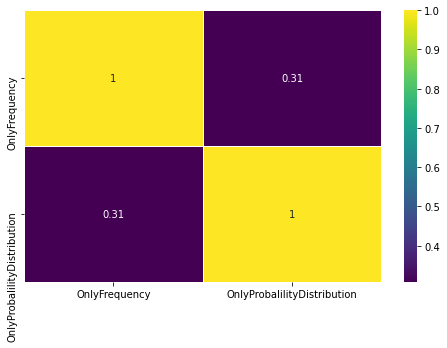

In [596]:
#analyse the train set using a Multivariate Analysis techniques i.e. Correlation matrix 
cormat=final_train_df.corr()
plt.figure(figsize=(8,5))
g= sns.heatmap(cormat,annot=True,cmap='viridis',linewidths=.5)

<AxesSubplot:xlabel='ClassName', ylabel='OnlyFrequency'>

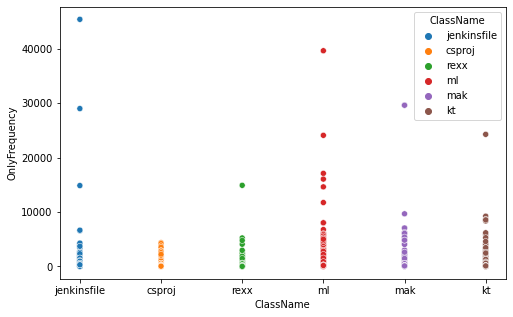

In [597]:
final_train_set=final_train_df.join(y_train)

plt.figure(figsize=(8,5))
sns.scatterplot(y='OnlyFrequency', x='ClassName', data=final_train_set, hue='ClassName')

<AxesSubplot:xlabel='ClassName', ylabel='OnlyProbalilityDistribution'>

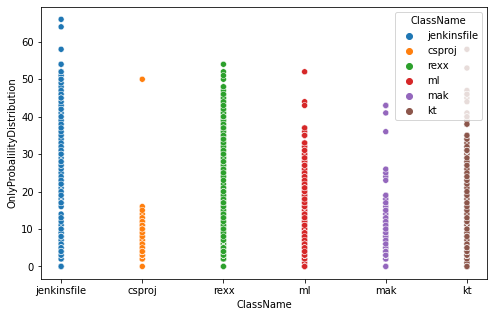

In [598]:
plt.figure(figsize=(8,5))
sns.scatterplot(y='OnlyProbalilityDistribution', x='ClassName', data=final_train_set, hue='ClassName')

<AxesSubplot:xlabel='OnlyValueForAbsoluteDistribution', ylabel='ClassName'>

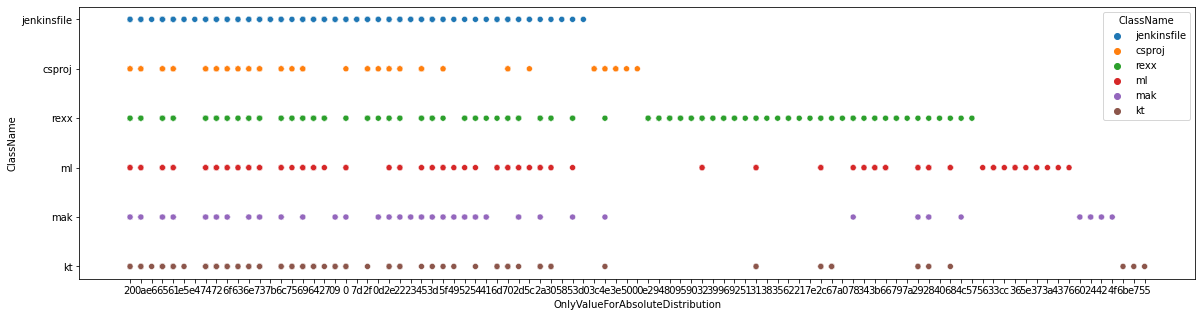

In [599]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='OnlyValueForAbsoluteDistribution', y='ClassName', data=final_train_set, hue='ClassName')

##### MultiVariate Analysis (PCA)

## Feature Engineering

In [600]:
final_train_set['encoded_ClassName']= preprocessing.LabelEncoder().fit_transform(final_train_set['ClassName'])
final_y_train=final_train_set['encoded_ClassName']
final_y_train

0        1
1        1
2        1
3        1
4        1
        ..
10202    2
10203    2
10204    2
10205    2
10206    2
Name: encoded_ClassName, Length: 10207, dtype: int32

In [601]:
final_val_set=final_val_df.join(y_val)
final_test_set=final_test_df.join(y_test)

final_val_set['encoded_ClassName']= preprocessing.LabelEncoder().fit_transform(final_val_set['ClassName'])
final_y_val=final_val_set['encoded_ClassName']

final_test_set['encoded_ClassName']= preprocessing.LabelEncoder().fit_transform(final_test_set['ClassName'])
final_y_test=final_test_set['encoded_ClassName']

In [602]:
final_y_val

0       1
1       1
2       1
3       1
4       1
       ..
3751    2
3752    2
3753    2
3754    2
3755    2
Name: encoded_ClassName, Length: 3756, dtype: int32

In [603]:
final_y_test

0      1
1      1
2      1
3      1
4      1
      ..
423    2
424    2
425    2
426    2
427    2
Name: encoded_ClassName, Length: 428, dtype: int32

In [604]:
final_train_df['encoded_OnlyValueForAbsoluteDistribution']= preprocessing.LabelEncoder().fit_transform(final_train_df['OnlyValueForAbsoluteDistribution'])
final_val_df['encoded_OnlyValueForAbsoluteDistribution']= preprocessing.LabelEncoder().fit_transform(final_val_df['OnlyValueForAbsoluteDistribution'])
final_test_df['encoded_OnlyValueForAbsoluteDistribution']= preprocessing.LabelEncoder().fit_transform(final_test_df['OnlyValueForAbsoluteDistribution'])

<ipython-input-604-db4d0f6e2a89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train_df['encoded_OnlyValueForAbsoluteDistribution']= preprocessing.LabelEncoder().fit_transform(final_train_df['OnlyValueForAbsoluteDistribution'])
<ipython-input-604-db4d0f6e2a89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_val_df['encoded_OnlyValueForAbsoluteDistribution']= preprocessing.LabelEncoder().fit_transform(final_val_df['OnlyValueForAbsoluteDistribution'])
<ipython-input-604-db4d0f6e2a89>:3: Settin

In [605]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10207 entries, 0 to 10206
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   OnlyValueForAbsoluteDistribution          10207 non-null  object
 1   OnlyFrequency                             10207 non-null  int32 
 2   OnlyProbalilityDistribution               10207 non-null  int32 
 3   encoded_OnlyValueForAbsoluteDistribution  10207 non-null  int32 
dtypes: int32(3), object(1)
memory usage: 199.5+ KB


In [606]:
final_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   OnlyValueForAbsoluteDistribution          3756 non-null   object
 1   OnlyFrequency                             3756 non-null   int32 
 2   OnlyProbalilityDistribution               3756 non-null   int32 
 3   encoded_OnlyValueForAbsoluteDistribution  3756 non-null   int32 
dtypes: int32(3), object(1)
memory usage: 73.5+ KB


In [607]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   OnlyValueForAbsoluteDistribution          428 non-null    object
 1   OnlyFrequency                             428 non-null    int32 
 2   OnlyProbalilityDistribution               428 non-null    int32 
 3   encoded_OnlyValueForAbsoluteDistribution  428 non-null    int32 
dtypes: int32(3), object(1)
memory usage: 8.5+ KB


In [608]:
final_train_df.drop('OnlyValueForAbsoluteDistribution', axis=1, inplace=True)
final_val_df.drop('OnlyValueForAbsoluteDistribution', axis=1, inplace=True)
final_test_df.drop('OnlyValueForAbsoluteDistribution', axis=1, inplace=True)

c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [609]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10207 entries, 0 to 10206
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   OnlyFrequency                             10207 non-null  int32
 1   OnlyProbalilityDistribution               10207 non-null  int32
 2   encoded_OnlyValueForAbsoluteDistribution  10207 non-null  int32
dtypes: int32(3)
memory usage: 119.7 KB


In [610]:
final_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   OnlyFrequency                             3756 non-null   int32
 1   OnlyProbalilityDistribution               3756 non-null   int32
 2   encoded_OnlyValueForAbsoluteDistribution  3756 non-null   int32
dtypes: int32(3)
memory usage: 44.1 KB


In [611]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   OnlyFrequency                             428 non-null    int32
 1   OnlyProbalilityDistribution               428 non-null    int32
 2   encoded_OnlyValueForAbsoluteDistribution  428 non-null    int32
dtypes: int32(3)
memory usage: 5.1 KB


In [612]:
#final_train_df['FrequencyPerByte'] = final_train_df['OnlyFrequency']/final_train_df['encoded_OnlyValueForAbsoluteDistribution']
#final_val_df['FrequencyPerByte'] = final_val_df['OnlyFrequency']/final_val_df['encoded_OnlyValueForAbsoluteDistribution']
#final_test_df['FrequencyPerByte'] = final_test_df['OnlyFrequency']/final_test_df['encoded_OnlyValueForAbsoluteDistribution']

## Feature Selection

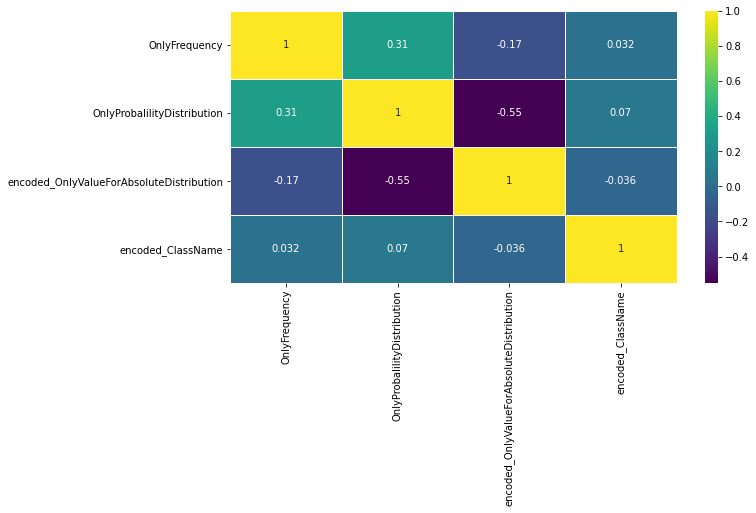

In [613]:
final_train_set=final_train_df.join(final_y_train)
cormat=final_train_set.corr()
plt.figure(figsize=(10,5))
g= sns.heatmap(cormat,annot=True,cmap='viridis',linewidths=.5)

### Building Model

##### SVM

In [614]:
# Fitting Support Vector Classifer to the Training set
classifier = SVC()
classifier.fit(final_train_df, y_train)
# Predicting the Test set results
y_val_pred = classifier.predict(final_val_df)
y_train_pred = classifier.predict(final_train_df)
y_test_pred = classifier.predict(final_test_df)
# Accuracy on the Train set results                              
print('\n'+'-'*20+'Accuracy Score on the Train set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_train,y_train_pred)))
# Accuracy on the Validation set results                              
print('\n'+'-'*20+'Accuracy Score on the Validation set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_val,y_val_pred)))
# Accuracy on the Test set results                              
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_test_pred)))


--------------------Accuracy Score on the Train set--------------------
47%

--------------------Accuracy Score on the Validation set--------------------
50%

--------------------Accuracy Score on the Test set--------------------
48%


#### Logistic Regression

In [630]:
# Fitting Logistic Regression to the Training set
logclassifier = LogisticRegression(max_iter=90000)
print(logclassifier)
logclassifier.fit(final_train_df, y_train)

y_val_pred = logclassifier.predict(final_val_df)
y_train_pred = logclassifier.predict(final_train_df)
y_test_pred = logclassifier.predict(final_test_df)
# Accuracy on the Train set results                              
print('\n'+'-'*20+'Accuracy Score on the Train set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_train,y_train_pred)))
# Accuracy on the Validation set results                              
print('\n'+'-'*20+'Accuracy Score on the Validation set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_val,y_val_pred)))
# Accuracy on the Test set results                              
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_test_pred)))

LogisticRegression(max_iter=90000)

--------------------Accuracy Score on the Train set--------------------
47%

--------------------Accuracy Score on the Validation set--------------------
51%

--------------------Accuracy Score on the Test set--------------------
47%


#### KNN

In [628]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=100)

# Train the model using the training sets
model.fit(final_train_df,y_train)

#Predict Output
y_val_pred = model.predict(final_val_df)
y_train_pred = model.predict(final_train_df)
y_test_pred = model.predict(final_test_df)
# Accuracy on the Train set results                              
print('\n'+'-'*20+'Accuracy Score on the Train set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_train,y_train_pred)))
# Accuracy on the Validation set results                              
print('\n'+'-'*20+'Accuracy Score on the Validation set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_val,y_val_pred)))
# Accuracy on the Test set results                              
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_test_pred)))


--------------------Accuracy Score on the Train set--------------------
49%

--------------------Accuracy Score on the Validation set--------------------
50%

--------------------Accuracy Score on the Test set--------------------
49%


#### Random Forest Classifier

In [631]:
# Fitting Random Forest Classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
print(classifier)
classifier.fit(final_train_df, y_train)

y_val_pred = logclassifier.predict(final_val_df)
y_train_pred = logclassifier.predict(final_train_df)
y_test_pred = logclassifier.predict(final_test_df)
# Accuracy on the Train set results                              
print('\n'+'-'*20+'Accuracy Score on the Train set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_train,y_train_pred)))
# Accuracy on the Validation set results                              
print('\n'+'-'*20+'Accuracy Score on the Validation set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_val,y_val_pred)))
# Accuracy on the Test set results                              
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_test_pred)))

RandomForestClassifier()

--------------------Accuracy Score on the Train set--------------------
47%

--------------------Accuracy Score on the Validation set--------------------
51%

--------------------Accuracy Score on the Test set--------------------
47%
